In [48]:
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score,silhouette_samples
# import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression
# import numpy as np
import time

In [2]:
trump_speech_df = pd.read_csv('C:/JK/Masters Studies/Fall 2017/KDD/Project 5/TrumpSpeech/MrTrumpSpeeches.csv',error_bad_lines=False, warn_bad_lines=False,header=0, delimiter="\~", quoting=3, engine='python')
# trump_speech_df.head()
def remove_nextline(text):
#     text = (re.sub("\n"," ",text).lower())
    return re.sub("[^a-zA-Z]"," ", text).lower()

trump_speech_df['subtitle1'] = trump_speech_df['subtitles'].apply(remove_nextline)

trump_speech_df['tokenized_subtitle'] = trump_speech_df['subtitle1'].apply(word_tokenize)
stopset = stopwords.words('english') + list(string.punctuation)
trump_speech_df['subtitle_stop']=trump_speech_df['tokenized_subtitle'] .apply(lambda x: [item for item in x if item not in stopset])
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa..."
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h..."
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead..."
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live..."
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d..."


In [3]:
lemmatizer = WordNetLemmatizer()
trump_speech_df['subtitle_lemma']=trump_speech_df['subtitle_stop'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
def func(row):
    return " ".join(row)
trump_speech_df['data'] = trump_speech_df['subtitle_lemma'].apply(lambda x: func(x))
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop,subtitle_lemma,data
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa...","[president, united, state, mr, go, trapp, fami...",president united state mr go trapp family than...
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h...","[officially, tuesday, november, ever, think, h...",officially tuesday november ever think hearing...
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead...","[music, music, music, greatness, country, lead...",music music music greatness country leader fre...
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live...","[welcome, star, president, music, place, live,...",welcome star president music place live place ...
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d...","[thank, music, great, people, granna, three, d...",thank music great people granna three day goin...


In [4]:
tf_vectorizer = TfidfVectorizer(min_df=5,max_df=0.95,ngram_range=(2,3),max_features=6000) 
# min_df - minimum number of documents a word should appear in. 
# max_df - max percentage of documents a word should appear in. Here 80%. If it is more than this, word is probably redundant
train_data_features_TF = tf_vectorizer.fit_transform(trump_speech_df['data'])
idf= tf_vectorizer.idf_
train_data_features_TF=train_data_features_TF.toarray()
d=dict(zip(tf_vectorizer.get_feature_names(), idf))
df=pd.DataFrame(list(d.items()),columns=['Words','Scores'])

In [6]:
trump_speech_df['tf_scores']=trump_speech_df.iloc[:5999].sum(axis=1)

In [32]:
bins = [20160201, 20160720, 20161108, 20170119, 20170120,20170803]
trump_speech_df['binned'] = pd.cut(trump_speech_df['upload_date'], bins,labels=['RNC-campaign','Presidential Campaign','President-Elected','Inaugural-Day','President'])
trump_speech_df['binned'].unique()

[RNC-campaign, Presidential Campaign, President-Elected, Inaugural-Day, President, NaN]
Categories (5, object): [RNC-campaign < Presidential Campaign < President-Elected < Inaugural-Day < President]

In [37]:
df=trump_speech_df[['tf_scores','average_rating','view_count']]
df_norm = (df - df.mean()) / (df.max() - df.min())

In [28]:
# df=trump_speech_df[['tf_scores','view_count','average_rating']]

# df.reshape(-1,1)

In [47]:
import time
start_time = time.time()
kmeans3 = KMeans(n_clusters=5, random_state=None).fit(df)
k3_labels = kmeans3.labels_
print(k3_labels)
k3_labels_df = pd.DataFrame(k3_labels)
print("--- %s seconds ---" % (time.time() - start_time))

[1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 4 1 1 1 1 1 1 1 1 1 0 1 1 1 4 1 0 1 0 1 1 0 1 1 1 1 1 1 1 4 0 3 1 0 1
 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 4 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 0 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 4 1 1 4 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 4 1 1
 0 4 4 1 1 1 1 0 1 1 1 1 1 1 0 1 1 4 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 4 1 1 0 1 1 1 2 1 1 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 4 1 1 1 1 0 1
 1 1 4 0 1 0 1 4 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 4 1 4 4 1 2 1
 4 2 1 4 1 1 1 0 1 1 1 0 1 1 1 1 4 1 1 1 4 0 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 2 1 1 1 1 1 4 1 0 1 1 1 1 4 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 4 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 

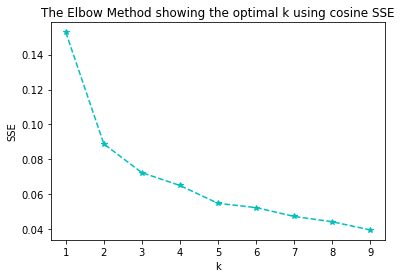

In [44]:
# print(df)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_norm)
#     kmeanModel.fit(deg_np)
#     print(k+kmeanModel.cluster_centers_)
    distortions.append(sum(np.min(cdist(df_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0])
    
#     print("SSE for " +str(k)+" is "+str())
# Plot the elbow
plt.plot(K, distortions,'c*--')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k using cosine SSE')
plt.show()

In [40]:
# k3_labels_df = pd.DataFrame(k3_labels)
print(k3_labels_df.head())
print(k3_labels_df.shape)
k3_labels_df['Time'] = trump_speech_df['binned'].values
print(k3_labels_df.head())
cluster3_withpercent = k3_labels_df
print(cluster3_withpercent.head())
cluster3_withpercent=cluster3_withpercent.rename(columns={0:'Label'})
print(cluster3_withpercent.head())
cluster3_withpercent['columns'] = cluster3_withpercent.groupby('Label')['Time'].cumcount()
cluster3_withpercent.head()
result3 = cluster3_withpercent.pivot(index='Label', columns='columns')
result3

   0
0  0
1  4
2  0
3  0
4  0
(836, 1)
   0                   Time
0  0           RNC-campaign
1  4  Presidential Campaign
2  0           RNC-campaign
3  0           RNC-campaign
4  0  Presidential Campaign
   0                   Time
0  0           RNC-campaign
1  4  Presidential Campaign
2  0           RNC-campaign
3  0           RNC-campaign
4  0  Presidential Campaign
   Label                   Time
0      0           RNC-campaign
1      4  Presidential Campaign
2      0           RNC-campaign
3      0           RNC-campaign
4      0  Presidential Campaign


Time                                                \
columns                    0                      1                      2     
Label                                                                          
0                 RNC-campaign           RNC-campaign           RNC-campaign   
1                    President              President              President   
2        Presidential Campaign  Presidential Campaign  Presidential Campaign   
3            President-Elected                   None                   None   
4        Presidential Campaign  Presidential Campaign  Presidential Campaign   

                                                                              \
columns                    3                      4                      5     
Label                                                                          
0        Presidential Campaign  Presidential Campaign  Presidential Campaign   
1                    President              President              President   
2                    President              President          Inaugural-Day   
3                         None                   None                   None   
4        Presidential Campaign           RNC-campaign  Presidential Campaign   

                                                                     \
columns                    6             7                      8     
Label                                                                 
0        Presidential Campaign  RNC-campaign  Presidential Campaign   
1                Inaugural-Day     President              President   
2                    President     President              President   
3                         None          None                   None   
4        Presidential Campaign  RNC-campaign           RNC-campaign   

                                        ...                                   \
columns                    9            ...                              660   
Label                                   ...                                    
0        Presidential Campaign          ...            Presidential Campaign   
1                 RNC-campaign          ...                             None   
2                    President          ...                             None   
3                         None          ...                             None   
4        Presidential Campaign          ...                             None   

                                                                  \
columns                    661        662                    663   
Label                                                              
0        Presidential Campaign  President  Presidential Campaign   
1                         None       None                   None   
2                         None       None                   None   
3                         None       None                   None   
4                         None       None                   None   

                                                               \
columns           664        665   666                    667   
Label                                                           
0        RNC-campaign  President   NaN  Presidential Campaign   
1                None       None  None                   None   
2                None       None  None                   None   
3                None       None  None                   None   
4                None       None  None                   None   

                                                       
columns                    668                    669  
Label                                                  
0        Presidential Campaign  Presidential Campaign  
1                         None                   None  
2                         None                   None  
3                         None                   None  
4                         None                   None  

[5 rows x 670 colum

In [41]:
# Cluster 1 has 20 instances(40%) & cluster 2 has 18 instances(36%) & cluster 3 has 12 instances (24%)
print("Euclidean score : "+str(silhouette_score(df_norm,labels=k3_labels,metric='euclidean')))
print("Manhattan score : "+str(silhouette_score(df_norm,labels=k3_labels,metric='manhattan')))

Euclidean score : -0.0286626833823
Manhattan score : 0.141938800118


In [45]:
kmeans3 = KMeans(n_clusters=2, random_state=None).fit(df)
k3_labels = kmeans3.labels_
print(k3_labels)
k3_labels_df = pd.DataFrame(k3_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [46]:
print("Euclidean score : "+str(silhouette_score(df_norm,labels=k3_labels,metric='euclidean')))
print("Manhattan score : "+str(silhouette_score(df_norm,labels=k3_labels,metric='manhattan')))

Euclidean score : 0.603957810287
Manhattan score : 0.704810880101


In [49]:
undergrad_major_array = trump_speech_df['binned'].as_matrix()

Time elapsed clustering: 0.01905059814453125


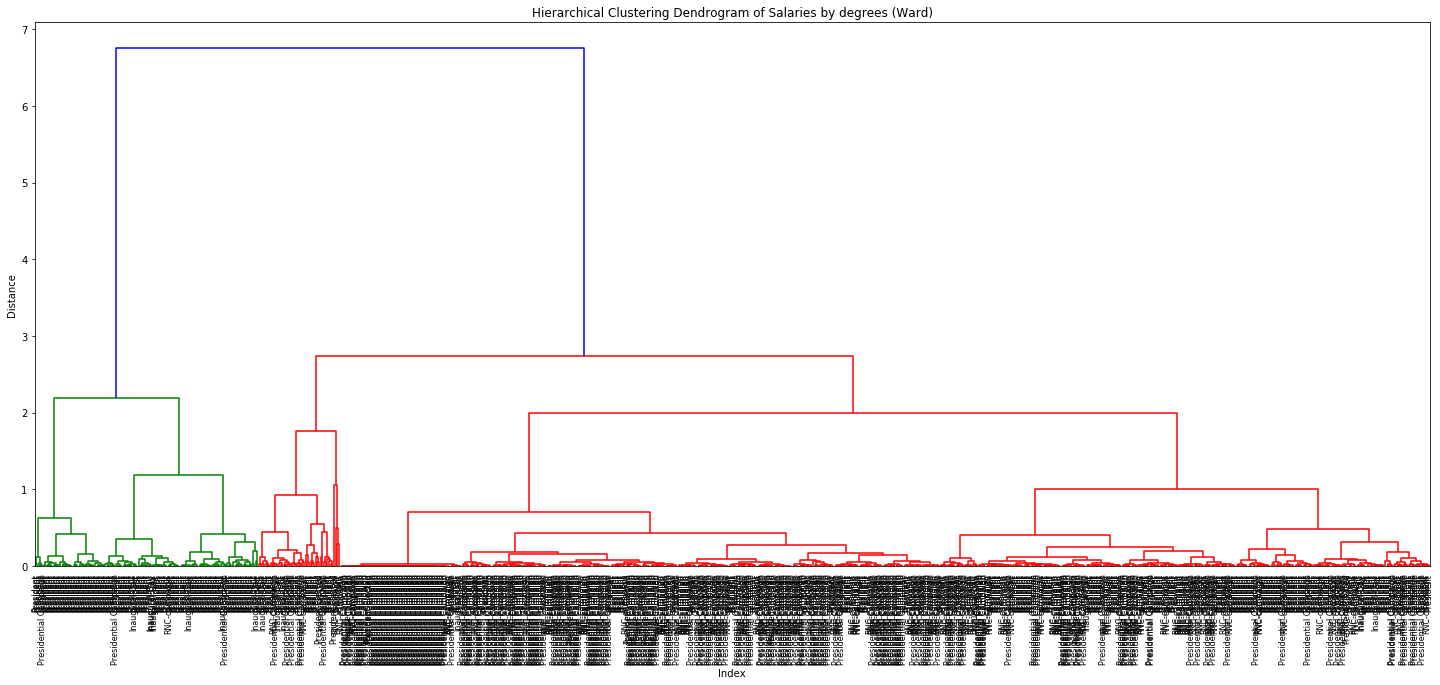

Time elapsed total: 4.684533357620239


In [51]:
import scipy.cluster.hierarchy as hac
start_time = time.time()
z = hac.linkage(df_norm, method='ward',metric='euclidean')
print("Time elapsed clustering: "+str(time.time() - start_time))
start_time = time.time()
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of Salaries by degrees (Ward)')
plt.xlabel('Index')
plt.ylabel('Distance')
d=hac.dendrogram(z,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = undergrad_major_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))